<a href="https://colab.research.google.com/github/licTomasPerez/-Code-Thesis-Non-markovian-Dynamics/blob/main/corr_xop_pop_Heisenberg_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [106]:
### XYZ Heisenberg model

solver = "me"   
N = 5            # número de spines

h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = 0.1 * 2 * np.pi * np.ones(N)
Jx = 0.15 * 2 * np.pi * np.ones(N)
Jy = 0.25 * 2 * np.pi * np.ones(N)

In [107]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    
    sx_list = []
    sy_list = []
    sz_list = []
    one_half_list = []
    num_expression_sz = []

    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))

    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result_sx = mesolve(H, psi0, tlist, c_op_list, sx_list)
        result_sy = mesolve(H, psi0, tlist, c_op_list, sy_list)
        result_sz = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 200 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result_sx.expect, result_sy.expect, result_sz.expect 
# esta función que se encarga de computar el hamiltoniano y la evolución hamiltoniana del estado inicial me devuelve una tupla de 3 elementos, 
# cada elementos siendo 5 listas de 10 datos c/u. Estas listas son los valores de expectación de los operadores de Pauli



In [108]:
# dephasing rate
gamma = 5 * 10**-10* np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
for n in range(2):
    psi_list.append(basis(2,0))
psi_list.append(basis(2,1))
for n in range(2):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 10, 100)

sx_expt, sy_expt, sz_expt = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)
# puedo extraer los  elementos de esta 3-tupla de esta forma 

In [109]:
from cmath import * 
from math import * 

def W(a,b, k_max): 
  return sum(e**(1j * k * (a-b))*k for k in range(k_max))

W(1,1, 10)

(45+0j)

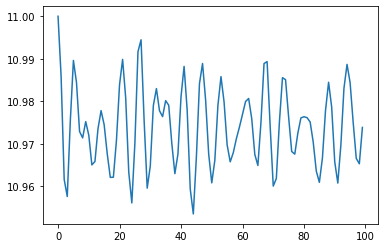

In [115]:
x_op = sum((.5 + sz_expt[i])*i for i in range(N))

def W(a,b, k_max): 
  return sum(e**(1j * k * 2 * pi * (a-b) * N**-1)*(k*2*pi*N**-1) for k in range(k_max))

p_op = np.real(sum(W(i,j,10)*(sx_expt[i]*sx_expt[j]+sy_expt[i]*sy_expt[j]) for i in range(N) for j in range(N)))

corr_xop_pop = .5*(x_op * p_op + p_op * x_op)

plt.plot(x_op)

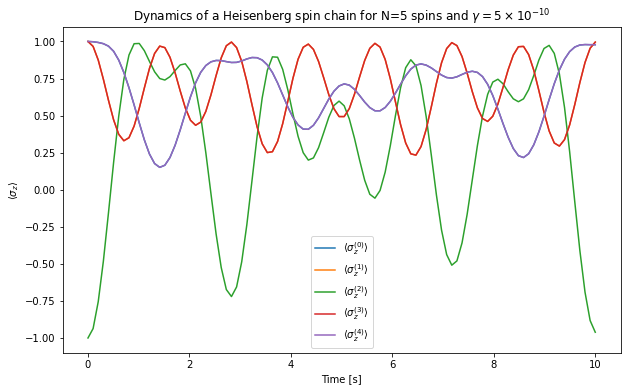

In [81]:
 fig, ax = plt.subplots(figsize=(10,6))

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 5\times 10^{-10} $');

Here we are interested in computing the following expression

$$
\mu_X = \frac{\bigg(\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}\bigg)i}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}}
$$

and the standard deviation is 


$$
\sigma^2_X= \frac{\bigg(\sum_{i=1}^N\langle s_{z}^{i} \rangle+ \frac{1}{2}\bigg)i^2}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}} - \bigg[\frac  {\bigg(\sum_{i=1}^N\langle s_{z}^{i} \rangle+ \frac{1}{2}\bigg)i}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}}\bigg]^2
$$

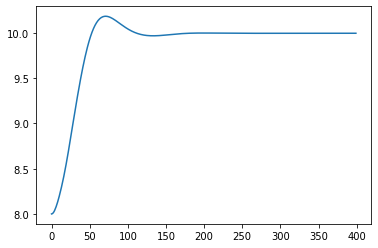

In [ ]:
denom_muX = sum(.5*(1-sz_expt[i]) for i in range(5))
mu_X= sum(.5*(1-sz_expt[i])*i for i in range((5)))/denom_muX
std_devX_term1 = sum(.5*(1-sz_expt[i])*i**2 for i in range((5)))/denom_muX
std_devX_term2 = mu_X**2

std_devX = std_devX_term1 + std_devX_term2


plt.plot(std_devX)

In [85]:
def func(x,y):
  return x+y, x+y**2

a, b = func(2,3)
c, d = func(1,1) 
a, b = func(a+b,c+d)

In [86]:
a

20